In [1]:
bayesian_hdx_dir = '../../pyext/src'

import sys
sys.path.append(bayesian_hdx_dir)
import scoring, sampling, system, model, hxio, tools, analysis, spectra

#from pyopenms import *
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sequence = "MNMKKLATLVSAVALSATVSANAMAKDTIALVVSTLNNPFFVSLKDGAQKEADKLGYNLVVLDSQNNPAKELANVQDLTVRGTKILLINPTDSDAVGNAVKMANQANIPVITLDRQATKGEVVSHIASDNVLGGKIAGDYIAKKAGEGAKVIELQGIAGTSAARERGEGFQQAVAAHKFNVLASQPADFDRIKGLNVMQNLLTAHPDVQAVFAQNDEMALGALRALQTAGKSDVMVVGFDGTPDGEKAVNDGKLAATIAQLPDQIGAKGVETADKVLKGEKVQAKYPVDLKLVVKQ"

infile_1 = "./data/bayesian_hdx_RBSB_1018_APO.dat"
infile_2 = "./data/bayesian_hdx_RBSB_1025_APO.dat"



In [3]:
dataset_1 = hxio.import_HXcolumns(infile_1,
                                sequence,
                                name="APO",
                                percentD=True,
                                conditions=None,
                                error_estimate=0.5,
                                n_fastamides=0,
                                offset=0)


raw_spectra_path_1 = '../rbsb/SpecExport_1018/'

hxio.load_raw_ms_to_hdxms_data(dataset_1, raw_spectra_path_1)
tools.set_t0_rep_score(dataset_1)
tools.refine_dataset(dataset_1)


# dataset_2 = hxio.import_HXcolumns(infile_2,
#                                 sequence,
#                                 name="APO",
#                                 percentD=True,
#                                 conditions=None,
#                                 error_estimate=0.5,
#                                 n_fastamides=0,
#                                 offset=0)

# raw_spectra_path_2 = '../rbsb/SpecExport_1025/'
# hxio.load_raw_ms_to_hdxms_data(dataset_2, raw_spectra_path_2)
# tools.set_t0_rep_score(dataset_2)
# tools.refine_dataset(dataset_2)

Standard Conditions used.  Please modify these in the script if you are not at 293K and pH=7


/home/chenlin/Documents/research_git/bayesian_hdx/v2/examples/rbsb_fulld/../../pyext/src/data.py:139: RuntimeWarning: divide by zero encountered in scalar divide
  fastest_logk = numpy.log10(-numpy.log(threshold)/first_time_point)


bad replicate droped: IPVITL 0.0 3
Done loading raw MS data.
Set score for 280 t0 replicates
num of tps before refining:  1161
Refining dataset...
LVVSTLNNPFFVS 30.0 removed
LVVSTLNNPFFVS 1920.0 removed
LVVSTLNNPFFVS 7680.0 removed
LVVSTLNNPFFVSL 30.0 removed
LVVSTLNNPFFVSL 1920.0 removed
LVVSTLNNPFFVSL 7680.0 removed
VVSTLNNPFFVSL 30.0 removed
VVSTLNNPFFVSL 480.0 removed
VVSTLNNPFFVSL 1920.0 removed
VVSTLNNPFFVSL 7680.0 removed
TLNNPFFVSL 30.0 removed
TLNNPFFVSL 480.0 removed
TLNNPFFVSL 3840.0 removed
TLNNPFFVSL 15360.0 removed
VSLKDGAQKEADKLGYNL 30.0 removed
AQKEADKLGYN 30.0 removed
AQKEADKLGYN 7680.0 removed
VVLDSQNNPAKELANVQDL 30.0 removed
VVLDSQNNPAKELANVQDL 1920.0 removed
VVLDSQNNPAKELANVQDL 7680.0 removed
DSQNNPAKELANVQDL 30.0 removed
DSQNNPAKELANVQDL 7680.0 removed
NNPAKELANVQ 30.0 removed
NNPAKELANVQ 15360.0 removed
NNPAKELANVQDLTVRGTK 30.0 removed
NNPAKELANVQDLTVRGTK 1920.0 removed
NNPAKELANVQDLTVRGTK 7680.0 removed
ELANVQDL 30.0 removed
ANVQDLTVRGTKIL 30.0 removed
ANVQDLTVRG

In [4]:
all_reps_1 = [rep for pep in dataset_1.peptides for tp in pep.timepoints for rep in tp.replicates]


In [5]:
def get_identifer(pep):
    idf = f'{pep.start_residue}-{pep.end_residue} {pep.sequence}'
    return idf

In [6]:

spectra.refine_large_error_reps(dataset_1)

1 outliers removed
1 outliers removed
2 outliers removed
1 outliers removed
2 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
2 outliers removed
2 outliers removed
0 outliers removed
1 outliers removed
0 outliers removed
1 outliers removed
2 outliers removed
2 outliers removed
0 outliers removed
1 outliers removed
1 outliers removed
2 outliers removed
1 outliers removed
2 outliers removed
2 outliers removed
2 outliers removed
2 outliers removed
0 outliers removed
0 outliers removed
1 outliers removed
1 outliers removed
1 outliers removed
2 outliers r

## the error in different charge states from the same one exp


(array([ 2.,  1.,  3., 19., 36., 35., 40., 28., 33., 44., 51., 60., 50.,
        44., 45., 51., 25., 15.,  7., 11.]),
 array([0.07453794, 0.14491078, 0.21528362, 0.28565646, 0.35602929,
        0.42640213, 0.49677497, 0.56714781, 0.63752065, 0.70789348,
        0.77826632, 0.84863916, 0.919012  , 0.98938483, 1.05975767,
        1.13013051, 1.20050335, 1.27087619, 1.34124902, 1.41162186,
        1.4819947 ]),
 <BarContainer object of 20 artists>)

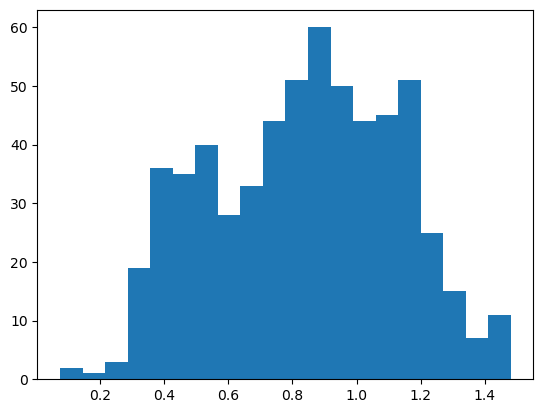

In [7]:
#average ae for experimental replicates

import itertools

replicates_list = []
for pep in dataset_1.peptides:
    for tp in pep.timepoints:
        replicates_list.append(tp.replicates)


error_lsit = []
large_error_list = []
for rep_list in replicates_list:
    if len(rep_list) == 1:
        continue
    if len(set([rep.timepoint.time for rep in rep_list])) != 1:
        continue    
    rep_combinations = list(itertools.combinations(rep_list, 2))
    abs_error =  np.average([tools.get_sum_ae(com[0].isotope_envelope, com[1].isotope_envelope) for com in rep_combinations])
    error_lsit.append(abs_error)
    if abs_error > 1.2:
        idf = get_identifer(rep_list[0].peptide)
        large_error_list.append(rep_list)
        #print(idf, abs_error)


plt.hist(error_lsit, bins=20)

In [8]:
def plot_ms_of_all_charge_states(reps):
    colors = ['r', 'b', 'g']
    fig, axes = plt.subplots(2,1, figsize=(10, 5))
    for ii,i in enumerate(reps):
        axes[0].stem(i.raw_ms['m/z']*i.charge_state, i.raw_ms['Intensity'],f"{colors[ii]}", label=f'charge {i.charge_state}')
        axes[1].stem(i.isotope_envelope,f"{colors[ii]}", label=f'charge {i.charge_state}')
        #$print(np.multiply(i.isotope_envelope,)
        #print(i.isotope_envelope)
        #print(np.array([i for i in range(len(i.isotope_envelope))]))
        print(np.sum(np.multiply(i.isotope_envelope, np.array([i for i in range(len(i.isotope_envelope))]))))
    plt.legend()

4.603216573625999
3.03692778319895


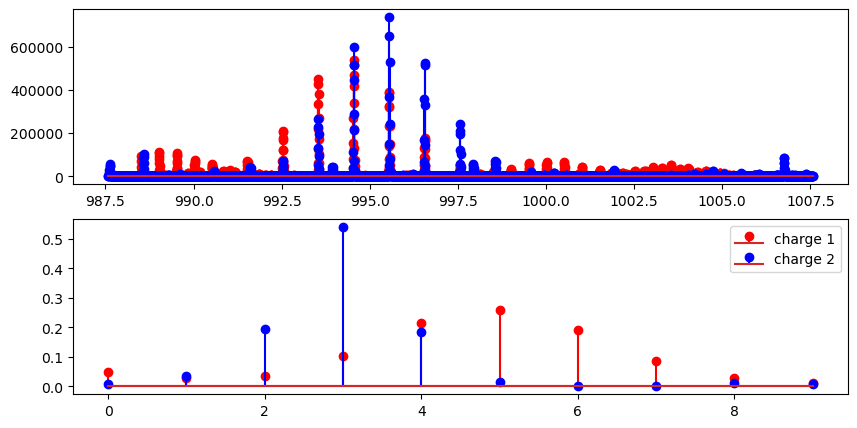

In [12]:
plot_ms_of_all_charge_states(large_error_list[5])

In [18]:
large_error_list[0]

[<data.Replicate at 0x7fa37c6209a0>, <data.Replicate at 0x7fa37c620a00>]

In [35]:
large_error_list[5][0].peptide.sequence

'VQDLTVRGTKIL'

In [13]:
def get_iso_sigma(timepoint):
    reps = timepoint.replicates
    if len(reps) == 1:
        return 0.5
    rep_combinations = list(itertools.combinations(reps, 2))
    abs_error =  np.average([tools.get_sum_ae(com[0].isotope_envelope, com[1].isotope_envelope) for com in rep_combinations])

    return abs_error

In [14]:
get_iso_sigma(dataset_1.peptides[10].timepoints[2])

1.713872282296158

In [15]:
import numpy as np

def get_weighted_avg_iso_envelope(timepoint):
    reps = timepoint.replicates
    
    weights = np.array([rep.raw_ms['Intensity'][rep.raw_ms['Intensity'] > 1e3].mean() for rep in reps])
    weights /= weights.sum()
    
    max_len = max(len(rep.isotope_envelope) for rep in reps)
    
    iso_envelopes = []
    for rep in reps:
        padded_envelope = tools.custom_pad(rep.isotope_envelope, max_len)
        iso_envelopes.append(padded_envelope)
    
    iso_envelopes = np.array(iso_envelopes)
    
    weighted_average_envelope = np.average(iso_envelopes, axis=0, weights=weights)
    weighted_average_envelope /= weighted_average_envelope.sum()
    
    return weighted_average_envelope


In [16]:
get_weighted_avg_iso_envelope(dataset_1.peptides[0].timepoints[0])

array([0.02679622, 0.69180121, 0.10075463, 0.03240544, 0.07655002,
       0.01700112, 0.01188728, 0.01573041, 0.0249918 , 0.00208185])

In [17]:
reps= dataset_1.peptides[0].timepoints[0].replicates


<StemContainer object of 3 artists>

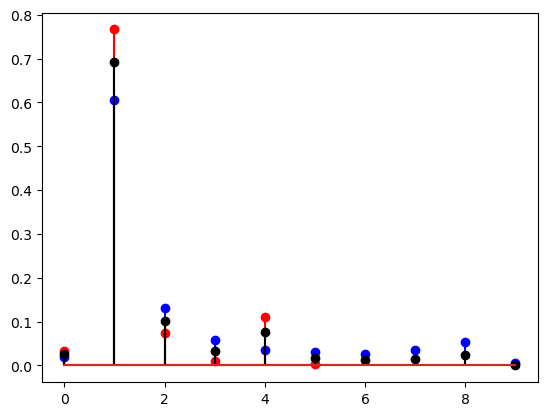

In [18]:
plt.stem(reps[0].isotope_envelope, 'b')
plt.stem(reps[1].isotope_envelope, 'r')
plt.stem(get_weighted_avg_iso_envelope(dataset_1.peptides[0].timepoints[0]), 'k')

<StemContainer object of 3 artists>

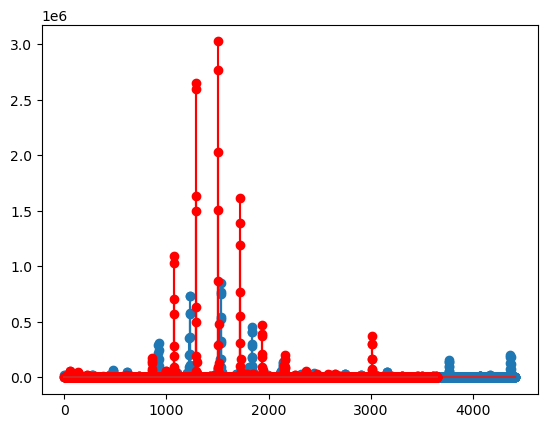

In [19]:
plt.stem(rep_combinations[0][0].raw_ms['Intensity'])
plt.stem(rep_combinations[0][1].raw_ms['Intensity'], 'r')

<StemContainer object of 3 artists>

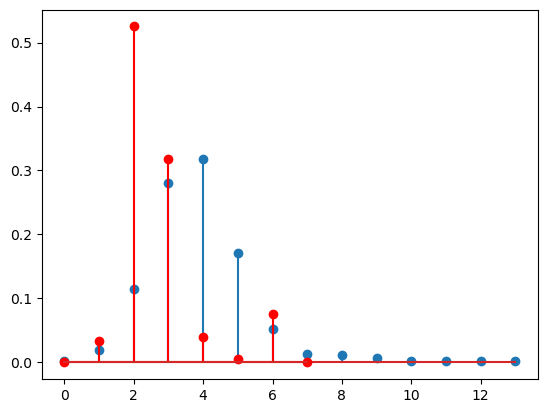

In [20]:
plt.stem(tools.get_isotope_envelope(rep_combinations[0][0])['Intensity'])
plt.stem(tools.get_isotope_envelope(rep_combinations[0][1])['Intensity'], 'r')

<StemContainer object of 3 artists>

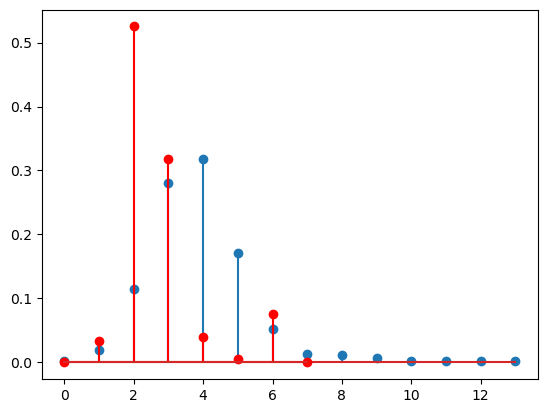

In [21]:
plt.stem(rep_combinations[0][0].isotope_envelope)
plt.stem(rep_combinations[0][1].isotope_envelope, 'r')

<StemContainer object of 3 artists>

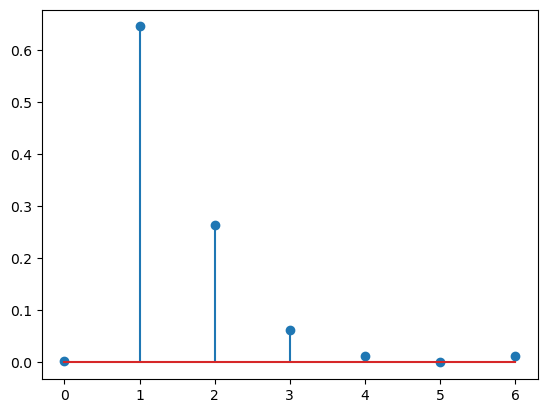

In [22]:
rep = rep_combinations[0][0].peptide.best_t0_replicate

plt.stem(rep.isotope_envelope)

In [101]:
[tp.time for tp in rep_combinations[0][0].peptide.timepoints]

[0.0, 30.0, 120.0, 480.0, 960.0, 1920.0, 3840.0, 7680.0, 15360.0]

## same timepoint and same charge state from two experiments

In [21]:
#average ae for experimental replicates

import itertools

replicates_list = []
for pep_1 in dataset_1.peptides:
    for pep_2 in dataset_2.peptides:
        if pep_1.sequence == pep_2.sequence:
            for tp1 in pep_1.timepoints:
                for tp2 in pep_2.timepoints:
                    if tp1.time == tp2.time:
                        replicates_list.append((tp1.replicates, tp2.replicates))



error_lsit = []
rep_combinations_list = []
for rep_list in replicates_list:
    if len(set([rep.timepoint.time for rep in rep_list[0]])) != 1 or len(set([rep.timepoint.time for rep in rep_list[1]])) != 1:
        continue    
    rep_combinations = list(itertools.product(rep_list[0], rep_list[1]))

    abs_error =  np.average([tools.get_sum_ae(com[0].isotope_envelope, com[1].isotope_envelope) for com in rep_combinations if com[0].charge_state == com[1].charge_state])
    error_lsit.append(abs_error)
    if abs_error > 1.5:
        idf = get_identifer(rep_list[0][0].peptide)
        print(idf, abs_error)
        rep_combinations_list.append(rep_combinations)


42-58 VSLKDGAQKEADKLGYN 1.7810875267016057
178-182 KFNVL 1.515495280499625
183-193 ASQPADFDRIK 1.5746004597148142
183-195 ASQPADFDRIKGL 1.5395736153976545
183-195 ASQPADFDRIKGL 1.633960530671087
201-212 LLTAHPDVQAVF 1.9541274108837499
219-234 ALGALRALQTAGKSDV 1.6376115516408845
235-255 MVVGFDGTPDGEKAVNDGKLA 1.7416736620955122


/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(array([ 94., 179., 135., 103.,  75.,  47.,  46.,  24.,  27.,  17.,  16.,
         20.,  18.,  17.,  10.,   4.,   3.,   1.,   1.,   1.]),
 array([0.00369187, 0.10121365, 0.19873543, 0.2962572 , 0.39377898,
        0.49130076, 0.58882253, 0.68634431, 0.78386609, 0.88138786,
        0.97890964, 1.07643142, 1.1739532 , 1.27147497, 1.36899675,
        1.46651853, 1.5640403 , 1.66156208, 1.75908386, 1.85660563,
        1.95412741]),
 <BarContainer object of 20 artists>)

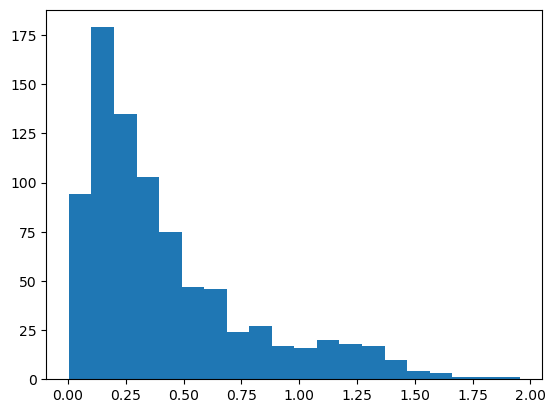

In [22]:
plt.hist(error_lsit, bins=20)

<StemContainer object of 3 artists>

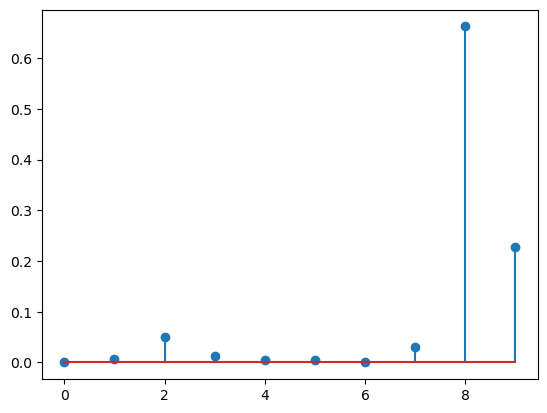

In [24]:
plt.stem(rep_combinations_list[0][0][0].isotope_envelope)
#plt.stem(rep_combinations_list[0][0][1].isotope_envelope, 'r')

<StemContainer object of 3 artists>

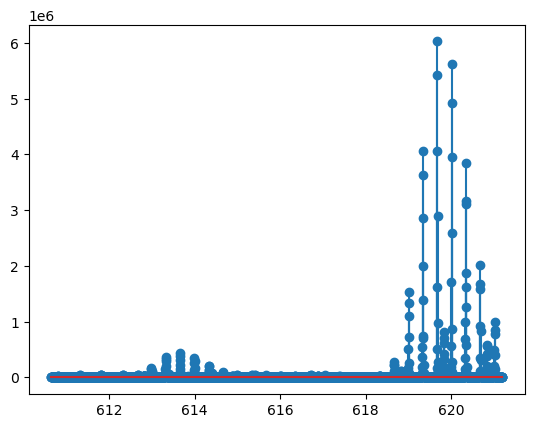

In [25]:
plt.stem(rep_combinations_list[0][0][0].raw_ms['m/z'], rep_combinations_list[0][0][0].raw_ms['Intensity'])
#plt.stem(rep_combinations_list[0][0][1].raw_ms['Intensity'], 'r')

In [26]:
rep_combinations_list[0][0][0].raw_ms

,m/z,Intensity
0,610.6458,0.0000
1,610.6488,1317.5064
2,610.6518,3325.1726
3,610.6548,5541.2665
4,610.6578,5799.7682
...,...,...
3499,621.1765,5.0456
3500,621.1795,526.9544
3501,621.1825,8.2800
3502,621.1855,863.7200


<StemContainer object of 3 artists>

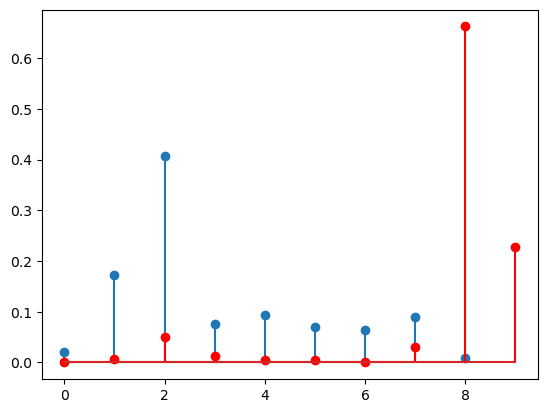

In [27]:
plt.stem(tools.get_isotope_envelope(rep)['m/z'], tools.get_isotope_envelope(rep)['Intensity'])

plt.stem(rep_combinations_list[0][0][0].isotope_envelope, 'r')



<StemContainer object of 3 artists>

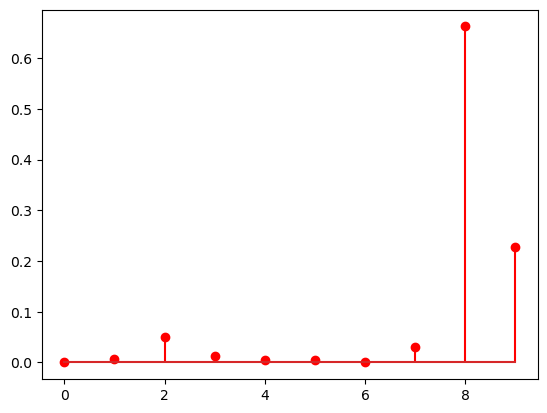

In [28]:
plt.stem(rep_combinations_list[0][0][0].isotope_envelope, 'r')

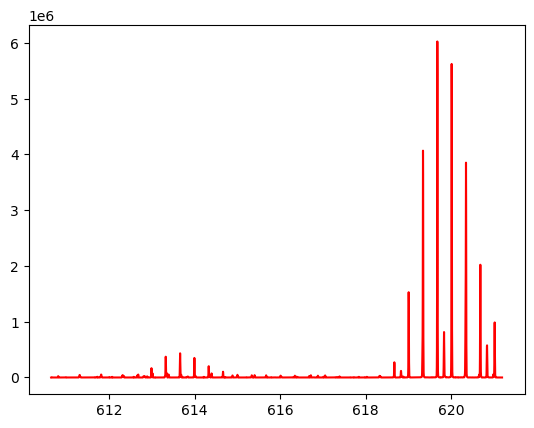

In [29]:
plt.plot(rep_combinations_list[0][0][0].raw_ms['m/z'], rep_combinations_list[0][0][0].raw_ms['Intensity'], 'r')

## best t0 replicates from two experiments

In [31]:
# best t0 replicates

import itertools

replicates_list = []
for pep_1 in dataset_1.peptides:
    for pep_2 in dataset_2.peptides:
        if pep_1.sequence == pep_2.sequence:
                replicates_list.append((pep_1.best_t0_replicate , pep_2.best_t0_replicate ))




error_lsit = []
rep_combinations_list = []
for rep_list in replicates_list:
  
    rep_combinations = [rep_list[0], rep_list[1]]

    abs_error =  np.average([tools.get_sum_ae(rep_list[0].isotope_envelope, rep_list[1].isotope_envelope)])
    error_lsit.append(abs_error)
    if abs_error > 1.0:
        idf = get_identifer(rep_list[0].peptide)
        print(idf, abs_error)
        rep_combinations_list.append(rep_combinations)




31-41 LVVSTLNNPFF 1.0391191015242203
213-223 AQNDEMALGAL 1.1555148714895587
219-224 ALGALR 1.3136028911513264


<StemContainer object of 3 artists>

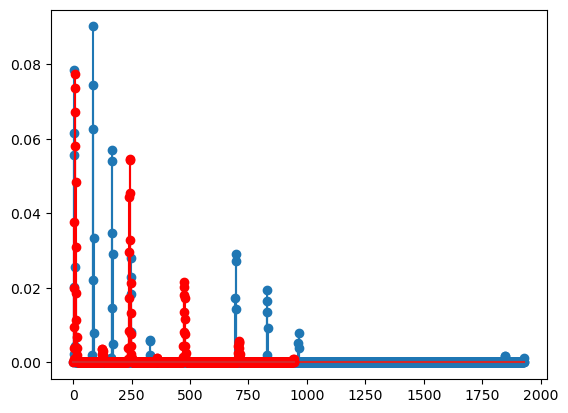

In [115]:
plt.stem(rep_combinations_list[0][0].raw_ms['Intensity'])
plt.stem(rep_combinations_list[0][1].raw_ms['Intensity'], 'r')

In [112]:
rep_combinations_list

[]